#Tratamento dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
from collections import OrderedDict

In [ ]:
dataPrev = pd.read_csv("/content/drive/MyDrive/Datasets/Teste.csv",sep=';')

dataPrev.head()

,Agente Causador Acidente,Data Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Afastamento,Data Despacho Benefício,Data Acidente.1,Data Nascimento,Data Emissão CAT
0,"Vidraria, Fibra de V",2020/01,322230,322230-Auxiliar de E,S610,S61.0 Ferim de Dedos,9491,Atividades de Organi,Empregador,Pa,Empregado,Não,351880-Guarulhos,Lesao Imediata,Internet,Dedo,Feminino,Típico,Maranhão,São Paulo,0000/00,0000/00,01/01/2020,07/09/1977,02/01/2020
1,Agente Infeccioso ou,2020/01,322205,322205-Tec. de Enfer,Z209,Z20.9 Contato Exposi,8610,Atividades de Atendi,Empregador,Pa,Empregado,Não,230440-Fortaleza,"Corte, Laceracao, Fe",Internet,Dedo,Feminino,Típico,{ñ class},Ceará,0000/00,0000/00,02/01/2020,27/11/1987,02/01/2020
2,{ñ class},2020/01,322205,322205-Tec. de Enfer,Y289,Y28.9 Local Ne,8610,Atividades de Atendi,Empregador,Pa,Empregado,Não,355030-São Paulo,"Corte, Laceracao, Fe",Internet,Dedo,Masculino,Típico,Maranhão,São Paulo,0000/00,0000/00,01/01/2020,03/01/1983,02/01/2020
3,"Motor, Bomba, Turbin",2020/01,314410,314410-Tec. em Manut,S610,S61.0 Ferim de Dedos,1012,"Abate de Suinos, Ave",Empregador,Pa,Empregado,Não,420010-Abelardo Luz,"Corte, Laceracao, Fe",Internet,Dedo,Masculino,Típico,{ñ class},Santa Catarina,0000/00,0000/00,02/01/2020,08/10/1988,02/01/2020
4,Ferramenta Portatil,2020/01,724315,724315-Soldador,S610,S61.0 Ferim de Dedos,2599,Fabricacao de Produt,Empregador,Pa,Empregado,Não,310620-Belo Horizont,"Corte, Laceracao, Fe",Internet,Dedo,Masculino,Típico,Rondônia,Minas Gerais,2020/01,0000/00,02/01/2020,10/06/1976,02/01/2020


In [ ]:
dataPrev.shape

(81264, 25)

# Estudo das Partes do Corpo de Maiores Ocorrências

In [ ]:
localLesao = dataPrev['Parte Corpo Atingida']
localLesao = localLesao.value_counts().to_frame().reset_index()
localLesao.columns = ['Local','Total']
localLesao.head()

,Local,Total
0,Dedo,22678
1,Pe (Exceto Artelhos),7184
2,Mao (Exceto Punho ou,6473
3,Joelho,3372
4,Olho (Inclusive Nerv,3036


In [ ]:
#Categorizando
#refina_local = ['Pés','Mãos','Braços','Pernas','Tronco','Cabeça','Quadril']
Pes = ['Artelho','Pe (Exceto Artelhos)']
Maos = ['Mao','Punho','Dedos']
NC = ['{ñ class}           ']


selecao = localLesao['Local'].isin(Pes)
localLesao.replace(to_replace=Pes,value='Pés',inplace=True)

In [ ]:
for x in range(len(Pes)):
  localLesao.loc[localLesao.Local.str.contains(Pes[x]),'Local'] = 'Pés'

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
NC = ['{ñ class}','Localizaca','Partes Multipla']
for x in range(len(NC)):
  localLesao.loc[localLesao.Local.str.contains(NC[x]),'Local'] = 'Não Classificado'

In [ ]:
for x in range(len(Maos)):
  localLesao.loc[localLesao.Local.str.contains(Maos[x]),'Local'] = 'Mãos'

In [ ]:
Tronco = ['Tronco','Dorso','Torno','Respira','Digestivo','Circulatorio','Torax','Nervoso','Musculo-Esq','Abdome','Ombro','Circula']
for x in range(len(Tronco)):
  localLesao.loc[localLesao.Local.str.contains(Tronco[x]),'Local'] = 'Tronco'

In [ ]:
Braco = ['Superiores','Cotovelo','Braco','Antebraco']
for x in range(len(Braco)):
  localLesao.loc[localLesao.Local.str.contains(Braco[x]),'Local'] = 'Braco'

In [ ]:
Pernas = ['Inferiores','Joelho','Coxa','Perna']
for x in range(len(Pernas)):
  localLesao.loc[localLesao.Local.str.contains(Pernas[x]),'Local'] = 'Pernas'

In [ ]:
Cabeca = ['Nariz','Cabeca','Mandibula','Face','Cranio','Boca','Olho','Ouvido','Pescoco']
for x in range(len(Cabeca)):
  localLesao.loc[localLesao.Local.str.contains(Cabeca[x]),'Local'] = 'Cabeça'

In [ ]:
Quadris = ['Quadris','Sistema','Genito']
for x in range(len(Quadris)):
  localLesao.loc[localLesao.Local.str.contains(Quadris[x]),'Local'] = 'Quadril'

In [ ]:
localLesao = localLesao.groupby('Local').sum()
localLesao.reset_index(inplace=True)


In [ ]:
maxIndexLesao = localLesao.Total.idxmax()
localLesao.query("index== @maxIndexLesao")

,Local,Total
2,Dedo,22678


In [ ]:
localLesao.sort_values(by="Total",ascending=False,inplace=True)

In [ ]:
  localLesao.loc[localLesao.Local.str.contains("Dedo"),'Local'] = 'Dedo'

In [ ]:
#localLesao.drop(columns=['level_0','index'],inplace=True)
localLesao.index = range(localLesao.shape[0])
localLesao

,Local,Total
0,Dedo,22678
1,Tronco,16087
2,Mãos,10930
3,Cabeça,9146
4,Pés,7715
5,Pernas,5748
6,Braco,5391
7,Não Classificado,2635
8,Quadril,934


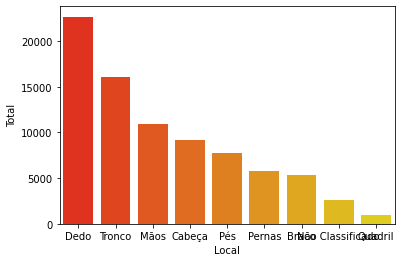

In [ ]:
sns.barplot(
    x = 'Local',
    y = 'Total',
    data = localLesao,
    palette = "autumn",
)

Text(0.5, 1.0, 'Quantidade de Acidentes por Região do Corpo')

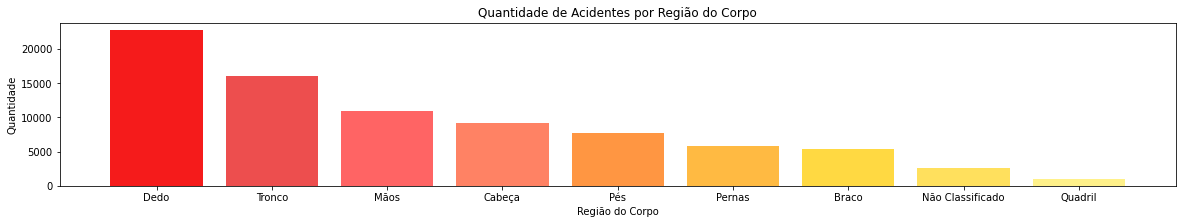

In [ ]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)
area = plt.figure()
x = plt.bar(x=localLesao.Local,
            height=localLesao.Total,
            color=['#f51b1b','#ed4e4e','#ff6464','#ff8264','#ff9642','#ffba42','#ffd942','#ffe05d','#fff18a'])
plt.xlabel('Região do Corpo')
plt.ylabel('Quantidade')
plt.title("Quantidade de Acidentes por Região do Corpo")

In [ ]:
area.savefig('Gráfico_Acidentes.png',dpi=300,bbox_inches='tight')

#Estudo por Sexo

In [ ]:
nSexo = dataPrev['Sexo']
nSexo = nSexo.value_counts().to_frame().reset_index()
nSexo.columns = ["Sexo","Total"]
nSexo.head()

,Sexo,Total
0,Masculino,56145
1,Feminino,24955
2,Não Informado,163
3,Indeterminado,1


In [ ]:
nSexo.Total[0]/nSexo.Total.sum()

0.6908963378617838

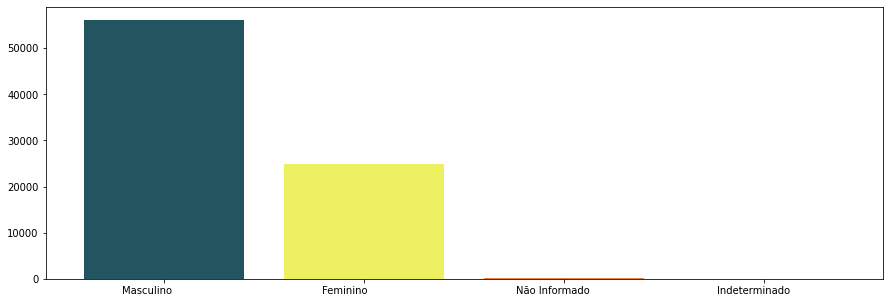

In [ ]:
area2 = plt.figure(figsize=(15,5))
y = plt.bar(x=nSexo.Sexo,
            height=nSexo.Total,
            color=['#225560','#EDF060','#F0803C','#310D20'],
            )


#Estudo por Região

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 4.1MB/s 
     |████████████████████████████████| 14.8MB 320kB/s 
     |████████████████████████████████| 6.5MB 36.7MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
localizacao = pd.DataFrame(dataPrev['UF Munic. Empregador'].value_counts())
#localizacao.reset_index(inplace=True)
#localizacao.columns=['UF','Total']
#localizacao.sort_values(by="UF")
localizacao.sort_index(ascending=True,inplace=True)

In [ ]:
localizacao.head()

,UF Munic. Empregador
Acre,64
Alagoas,478
Amapá,61
Amazonas,821
Bahia,2003


In [ ]:
localizacao.reset_index(inplace=True)
#localizacao.index = localizacao.index.str.upper()
localizacao.columns

Index(['index', 'UF Munic. Empregador'], dtype='object')

In [ ]:
#localizacao.drop('level_0',axis=1,inplace=True)

In [ ]:
localizacao.columns = ['NM_ESTADO','QUANTITY']
localizacao.head()

,NM_ESTADO,QUANTITY
0,Acre,64
1,Alagoas,478
2,Amapá,61
3,Amazonas,821
4,Bahia,2003


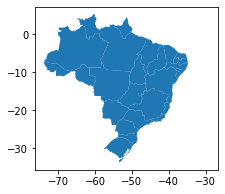

In [ ]:
fp = "/content/drive/MyDrive/Datasets/UFEBRASIL.shp"
map_df = gpd.read_file(fp)
map_df.plot()

In [ ]:
map_df.set_index('NM_ESTADO',inplace=True)

In [ ]:
map_df.sort_values(by='NM_ESTADO',ascending=True,inplace=True)

In [ ]:
map_df.reset_index(inplace=True)

In [ ]:
map_df.head()

,NM_ESTADO,ID,CD_GEOCODU,NM_REGIAO,geometry
0,ACRE,2,12,NORTE,"POLYGON ((-73.18253 -7.33550, -73.13680 -7.352..."
1,ALAGOAS,1,27,NORDESTE,"POLYGON ((-35.46753 -8.81744, -35.46659 -8.817..."
2,AMAPÁ,6,16,NORTE,"MULTIPOLYGON (((-51.17970 4.00008, -51.17784 3..."
3,AMAZONAS,3,13,NORTE,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
4,BAHIA,4,29,NORDESTE,"MULTIPOLYGON (((-39.36446 -8.53785, -39.36047 ..."


In [ ]:
merged = pd.concat([map_df,localizacao],axis=1)
merged.head()

,NM_ESTADO,ID,CD_GEOCODU,NM_REGIAO,geometry,NM_ESTADO,QUANTITY
0,ACRE,2,12,NORTE,"POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...",Acre,64
1,ALAGOAS,1,27,NORDESTE,"POLYGON ((-35.46753 -8.81744, -35.46659 -8.817...",Alagoas,478
2,AMAPÁ,6,16,NORTE,"MULTIPOLYGON (((-51.17970 4.00008, -51.17784 3...",Amapá,61
3,AMAZONAS,3,13,NORTE,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",Amazonas,821
4,BAHIA,4,29,NORDESTE,"MULTIPOLYGON (((-39.36446 -8.53785, -39.36047 ...",Bahia,2003


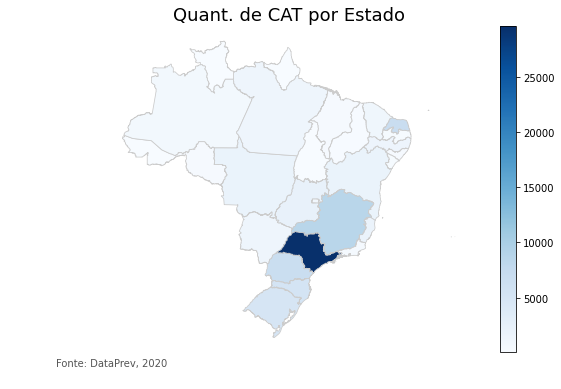

In [ ]:
variable = 'QUANTITY'
vmin, vmax = localizacao.QUANTITY.min(),localizacao.QUANTITY.max()
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

# add a title
ax.set_title('Quant. de CAT por Estado', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})
# create an annotation for the  data source
ax.annotate('Fonte: DataPrev, 2020',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [ ]:
localizacao.sort_values('QUANTITY',ascending=False).head(10)

,NM_ESTADO,QUANTITY
25,São Paulo,29551
12,Minas Gerais,8696
19,Rio Grande do Sul,7003
13,Paraná,6850
23,Santa Catarina,5358
20,Rio de Janeiro,5060
8,Goiás,2325
4,Bahia,2003
10,Mato Grosso,1946
7,Espírito Santo,1899


#Cargo

In [ ]:
cargo = dataPrev['CBO.1']
cargo.head(5)

0    322230-Auxiliar de E
1    322205-Tec. de Enfer
2    322205-Tec. de Enfer
3    314410-Tec. em Manut
4    724315-Soldador     
Name: CBO.1, dtype: object

In [ ]:
cargo = cargo.str.split("-",expand=True)
cargo

,0,1,2
0,322230,Auxiliar de E,None
1,322205,Tec. de Enfer,None
2,322205,Tec. de Enfer,None
3,314410,Tec. em Manut,None
4,724315,Soldador,None
...,...,...,...
81259,782510,Motorista de,None
81260,611005,Produtor Agro,None
81261,519110,Motociclista,None
81262,782510,Motorista de,None


In [ ]:
cargo.columns = ["CBO","Cargo","NA"]
cargo.head()

,CBO,Cargo,NA
0,322230,Auxiliar de E,None
1,322205,Tec. de Enfer,None
2,322205,Tec. de Enfer,None
3,314410,Tec. em Manut,None
4,724315,Soldador,None


In [ ]:
cargo.drop(columns="NA",inplace=True)
cargo

,CBO,Cargo
0,322230,Auxiliar de E
1,322205,Tec. de Enfer
2,322205,Tec. de Enfer
3,314410,Tec. em Manut
4,724315,Soldador
...,...,...
81259,782510,Motorista de
81260,611005,Produtor Agro
81261,519110,Motociclista
81262,782510,Motorista de


In [ ]:
maiores_acidentados = cargo.CBO.value_counts().rename_axis('CBO').reset_index(name='Qtd').head(5)
maiores_acidentados

,CBO,Qtd
0,{ñ class},8356
1,322205,5559
2,784205,5155
3,782510,1971
4,717020,1902


In [ ]:
NC = ['{ñ class}']
for x in range(len(NC)):
  maiores_acidentados.loc[maiores_acidentados.CBO.str.contains(NC[x]),'CBO'] = 'Não Classificado'
NC = ['322205']
for x in range(len(NC)):
  maiores_acidentados.loc[maiores_acidentados.CBO.str.contains(NC[x]),'CBO'] = 'Técnico de enfermagem'
  NC = ['784205']
for x in range(len(NC)):
  maiores_acidentados.loc[maiores_acidentados.CBO.str.contains(NC[x]),'CBO'] = 'Alimentador de linha de produção'
  NC = ['782510']
for x in range(len(NC)):
  maiores_acidentados.loc[maiores_acidentados.CBO.str.contains(NC[x]),'CBO'] = 'Motorista de caminhão'
  NC = ['717020']
for x in range(len(NC)):
  maiores_acidentados.loc[maiores_acidentados.CBO.str.contains(NC[x]),'CBO'] = 'Servente de obras'

In [ ]:
maiores_acidentados

,CBO,Qtd
0,Não Classificado,8356
1,Técnico de enfermagem,5559
2,Alimentador de linha de produção,5155
3,Motorista de caminhão,1971
4,Servente de obras,1902


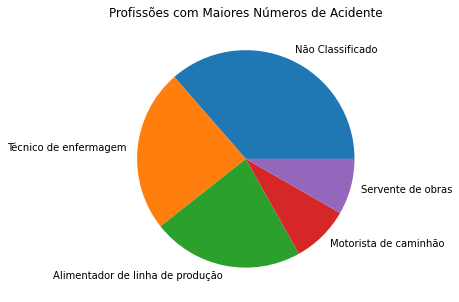

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
wedges, texts = ax.pie(x=maiores_acidentados.Qtd, labels = maiores_acidentados.CBO)
ax.set_title("Profissões com Maiores Números de Acidente")
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)


#Tipo do Acidente

In [ ]:
natuLesao = pd.DataFrame(dataPrev['Natureza da Lesão'])
natuLesao.head()

,Natureza da Lesão
0,Lesao Imediata
1,"Corte, Laceracao, Fe"
2,"Corte, Laceracao, Fe"
3,"Corte, Laceracao, Fe"
4,"Corte, Laceracao, Fe"


In [ ]:
maiores_lesoes = natuLesao.value_counts().rename_axis('Natureza').reset_index(name='Qtd').head(3)
maiores_lesoes

,Natureza,Qtd
0,"Corte, Laceracao, Fe",18545
1,Fratura,12747
2,"Lesao Imediata, Nic",11130


#Filiação

In [ ]:
filia = dataPrev['Filiação Segurado']
filia.value_counts(normalize=True)

Empregado               0.996444
Trabalhador Avulso      0.002560
Segurado Especial       0.000886
{ñ class}               0.000111
Name: Filiação Segurado, dtype: float64

#Estudo por Idade

In [ ]:
idades = pd.DataFrame(dataPrev['Data Nascimento'])
idades.columns = ['DataNascimento']
idades.head()

,DataNascimento
0,07/09/1977
1,27/11/1987
2,03/01/1983
3,08/10/1988
4,10/06/1976


In [ ]:
ano = idades.DataNascimento.str.split("/",expand=True)
ano.columns = ['Dia','Mes','Ano']
ano

,Dia,Mes,Ano
0,07,09,1977
1,27,11,1987
2,03,01,1983
3,08,10,1988
4,10,06,1976
...,...,...,...
81259,12,04,1979
81260,18,04,1994
81261,18,09,1976
81262,21,07,1985


In [ ]:
ano.Ano = pd.to_numeric(ano.Ano)

In [ ]:
ano['IdadeAtual'] = 2020 - ano.Ano
ano

,Dia,Mes,Ano,IdadeAtual
0,07,09,1977,43
1,27,11,1987,33
2,03,01,1983,37
3,08,10,1988,32
4,10,06,1976,44
...,...,...,...,...
81259,12,04,1979,41
81260,18,04,1994,26
81261,18,09,1976,44
81262,21,07,1985,35


In [ ]:
filtro_outliers = ano.query("IdadeAtual < 100 & IdadeAtual > 10")
filtro_outliers.reset_index()

,index,Dia,Mes,Ano,IdadeAtual
0,0,07,09,1977,43
1,1,27,11,1987,33
2,2,03,01,1983,37
3,3,08,10,1988,32
4,4,10,06,1976,44
...,...,...,...,...,...
81211,81259,12,04,1979,41
81212,81260,18,04,1994,26
81213,81261,18,09,1976,44
81214,81262,21,07,1985,35


In [ ]:
filtro_outliers.IdadeAtual.describe()

count    81216.000000
mean        36.737823
std         11.261633
min         15.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         86.000000
Name: IdadeAtual, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


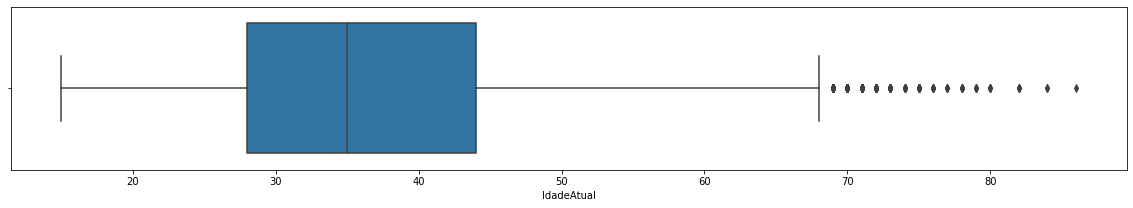

In [ ]:
sns.boxplot(filtro_outliers.IdadeAtual)

In [ ]:
import seaborn as sns

[(14.0, 86.0)]

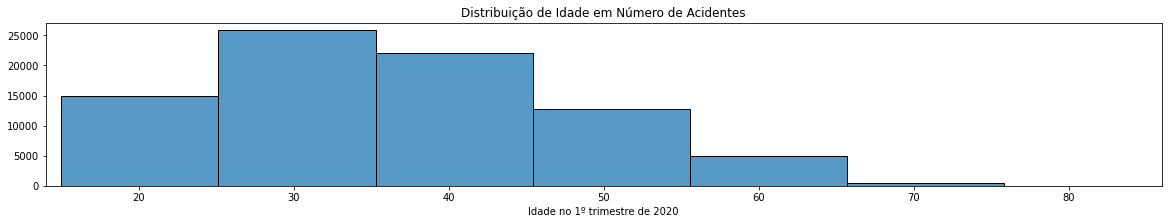

In [ ]:
ax = sns.histplot(filtro_outliers.IdadeAtual,bins=7)
ax.set_title('Distribuição de Idade em Número de Acidentes')
ax.set_ylabel('')
ax.set_xlabel('Idade no 1º trimestre de 2020')
ax.set(xlim=(filtro_outliers.IdadeAtual.min()-1,filtro_outliers.IdadeAtual.max()))

In [ ]:
filtro_outliers.IdadeAtual.value_counts()

31    2687
26    2664
33    2635
27    2622
35    2599
      ... 
80       4
82       4
15       3
84       2
86       1
Name: IdadeAtual, Length: 69, dtype: int64

#Emissão da CAT